# **Proyek Analisis Data: E-Commerce Public Dataset**
- **Nama:** Muhammad Syaoki Faradisa
- **Email:** syaokifaradisa09@gmailcom
- **ID Dicoding:** syaokifaradisa09

## **1. Menentukan Pertanyaan Bisnis**

- Bagaimana performa penjualan berdasarkan kategori produk dan bagaimana hal ini berubah seiring waktu?
- Bagaimana faktor pengiriman dapat dioptimalkan untuk meningkatkan kepuasan pelanggan secara keseluruhan berdasarkan data yang tersedia?

## **2. Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.ticker import FormatStrFormatter
import os

PROJECT_PATH = os.getcwd()

## **3. Data Wrangling**

### **3.1 Gathering Data**

#### 1. Load Data Order Item

In [2]:
df_order_items = pd.read_csv(f'{PROJECT_PATH}/data/order_items_dataset.csv')
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**Insight:**
- Adanya kolomn order_id, product_id, seller_id yang bisa di gabungkan dengan data table lain

#### 2. Load Data Order

In [3]:
df_orders = pd.read_csv(f"{PROJECT_PATH}/data/orders_dataset.csv")
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**Insight:**
- Adanya kolom customer_id yang bisa di gabungkan dengan data table lain

#### 3. Load Data Customer

In [4]:
df_customers = pd.read_csv(f"{PROJECT_PATH}/data/customers_dataset.csv")
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**Insight:**
- Table customer tidak memiliki id dari tabel lain lagi (foreign_key)

#### 4. Load Data Product

In [5]:
df_products = pd.read_csv(f"{PROJECT_PATH}/data/products_dataset.csv")
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**Insight:**
- Adanya kolom product_category_name yang juga dimiliki oleh table lain sehingga bisa digabungkan dengan table tersebut

#### 5. Load Data Category Name Translation

In [6]:
df_category_translation = pd.read_csv(f"{PROJECT_PATH}/data/product_category_name_translation.csv")
df_category_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


**Insight:**
- Table category name translation tidak memiliki sub data dari table lain

#### 6. Load Data Seller Translation

In [7]:
df_sellers = pd.read_csv(f"{PROJECT_PATH}/data/sellers_dataset.csv")
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**Insight:**
- Table seller tidak memiliki sub data dari table lain

#### 7. Load Data Payment

In [8]:
df_payment = pd.read_csv(f"{PROJECT_PATH}/data/order_payments_dataset.csv")
df_payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


**Insight:**
- Table payment terhubung dengan table orders melalui order_id

#### 8. Load Data Reviews

In [9]:
df_review = pd.read_csv(f"{PROJECT_PATH}/data/order_reviews_dataset.csv")
df_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


**Insight:**
- Table rwviews terhubung dengan table orders melalui order_id

#### 8. Menggabungkan Data

In [10]:
# 1. Menggabungkan products dengan product_category_translation
products_with_categories = df_products.merge(
    df_category_translation,
    on='product_category_name',
    how='left'
)

# 2. Menggabungkan order_items dengan products yang sudah memiliki informasi kategori
order_items_with_products = df_order_items.merge(
    products_with_categories,
    on='product_id',
    how='left'
)

# 3. Menggabungkan hasil sebelumnya dengan informasi seller
order_items_with_products_sellers = order_items_with_products.merge(
    df_sellers,
    on='seller_id',
    how='left'
)

# 4. Menggabungkan orders dengan customers
orders_with_customers = df_orders.merge(
    df_customers,
    on='customer_id',
    how='left'
)

# 5. orders dan customers dengan order_items, products, dan sellers
order_items_customers_with_products_sellers = orders_with_customers.merge(
    order_items_with_products_sellers,
    on='order_id',
    how='left'
)

# 6. orders dan customers dengan order_items, products, sellers, dan reviews
order_items_customers_with_products_sellers_reviews = order_items_customers_with_products_sellers.merge(
    df_review,
    on='order_id',
    how='left'
)

# 7. orders dan customers dengan order_items, products, sellers, reviews dan payment
final_df = order_items_customers_with_products_sellers_reviews.merge(
    df_payment,
    on='order_id',
    how='left'
)

final_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,1.0,credit_card,3.0,195.00
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,1.0,credit_card,5.0,271.01
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,1.0,credit_card,4.0,441.16
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,1.0,credit_card,4.0,441.16


**Insight:**
- Keseluruhan table sudah digabungkan hingga menjadi 1 dataset utuh dengan baris sebanyak 119143 dan kolom sebanyak 40

### **3.2 Assessing Data**

#### 1. Identifikasi Dataset

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  order_item_id                 

**Insight:**
- Volume Data: Dataset e-commerce ini berisi 119.143 catatan transaksi dengan 40 kolom yang mencakup informasi pesanan, pelanggan, produk, penjual, ulasan, dan pembayaran.
- Missing value: Terdapat beberapa nilai yang hilang pada kolom penting seperti order_approved_at (177 missing), order_delivered_carrier_date (2.086 missing), order_delivered_customer_date (3.421 missing), dan product_category_name (2.542 missing). Data ulasan juga memiliki banyak nilai kosong pada kolom review_comment_title (105.154 missing) dan review_comment_message (68.898 missing).
- Tipe Data Tidak Sesuai: Enam kolom yang berhubungan dengan waktu (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, dan shipping_limit_date) saat ini tersimpan sebagai tipe "object" (string), bukan format datetime yang diperlukan untuk analisis temporal yang akurat.

#### 2. Perhitungan Missing Values

In [12]:
final_df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
product_category_name              2542
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542
product_weight_g                    853
product_length_cm                   853
product_height_cm                   853


**Insight:**
- Terdapat beberapa nilai yang hilang pada kolom yang berhubungan dengan produk dan penjual: product_id (833 nilai), seller_id (833 nilai), dan shipping_limit_date (833 nilai). Kesamaan jumlah nilai yang hilang ini menunjukkan kemungkinan adanya transaksi yang tidak memiliki informasi produk lengkap.
- Kolom yang berhubungan dengan review memiliki banyak nilai yang hilang: review_score (997 nilai), review_comment_title (105.154 nilai), review_comment_message (68.898 nilai), review_creation_date (997 nilai), dan review_answer_timestamp (997 nilai). Hal ini wajar karena tidak semua pelanggan memberikan ulasan setelah melakukan pembelian, sehingga tidak perlu dilakukan imputasi.
- Nilai yang berhubungan dengan pembayaran juga memiliki nilai yang hilang dengan jumlah yang sama: payment_sequential (3 nilai), payment_type (3 nilai), payment_installments (3 nilai), dan payment_value (3 nilai). Konsistensi jumlah nilai yang hilang ini menunjukkan ada 3 transaksi yang tidak memiliki informasi pembayaran lengkap, sehingga tidak diperlukan imputasi.
- Dari data ini, terlihat bahwa kolom transaksi utama (order_id, order_status, order timestamps) dan data pelanggan tidak memiliki nilai yang hilang (0 missing value), menunjukkan bahwa struktur data dasar tetap terjaga meskipun beberapa detail spesifik tidak lengkap.

#### 3. Mengecek Duplikasi Data

In [13]:
print("Jumlah duplikasi: ", final_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada masalah duplikasi pada dataset

#### 4. Analisa Nilai Dataset

In [14]:
final_df.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value
count,119143.000000,118310.000000,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118146.000000,119140.000000,119140.000000,119140.000000
mean,35033.451298,1.196543,120.646603,20.032387,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,4.015582,1.094737,2.941246,172.735135
std,29823.198969,0.699489,184.109691,15.836850,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,1.400436,0.730141,2.777848,267.776077
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,1.000000,0.000000,0.000000
25%,11250.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000,1.000000,1.000000,60.850000
50%,24240.000000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,5.000000,1.000000,2.000000,108.160000
75%,58475.000000,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,5.000000,1.000000,4.000000,189.240000
max,99990.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000,29.000000,24.000000,13664.080000


**Insight:**
- Jika dilihat secara umum, tidak ada masalah pada data

#### 5. Analisa Nilai Outlier

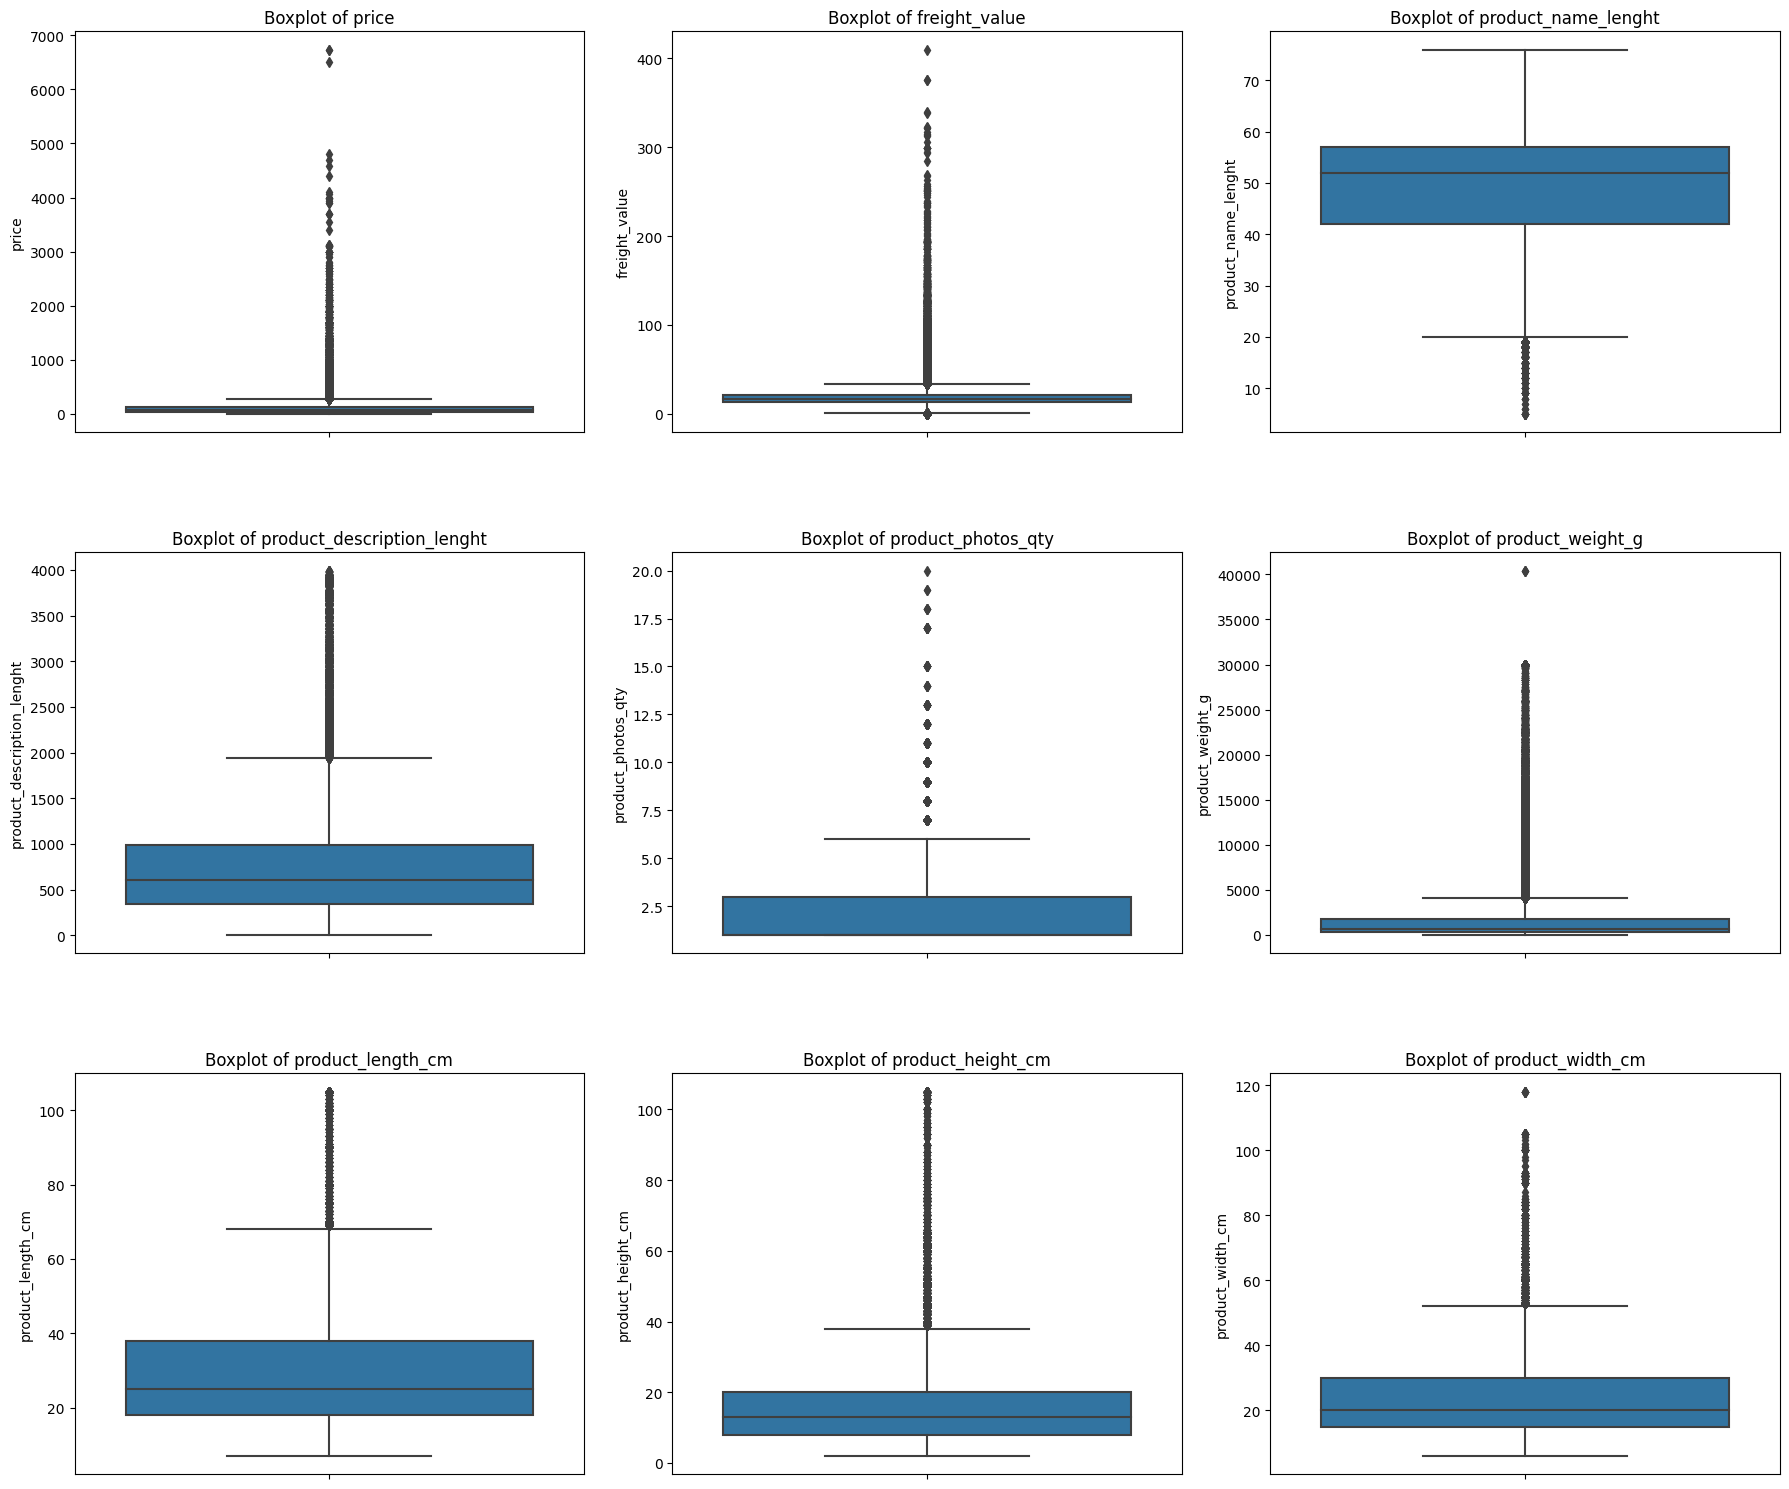

In [15]:
columns_to_plot = [
    'price',
    'freight_value',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'review_score',
    'payment_value',
    'delivery_time_days'
]

existing_columns = [col for col in columns_to_plot if col in final_df.columns]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, column in enumerate(existing_columns):
    if i < len(axes):
        sns.boxplot(y=final_df[column], ax=axes[i])

        axes[i].set_title(f'Boxplot of {column}', fontsize=12)
        axes[i].set_ylabel(column, fontsize=10)

for j in range(len(existing_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.show()

**Insight:**
- Sebagian besar produk memiliki harga yang rendah (di bawah 200), dengan distribusi yang condong ke kanan. Terdapat outlier ekstrem dengan harga mencapai 6000-7000, yang mungkin mewakili produk premium atau barang elektronik mahal.
- Biaya pengiriman (freight_value) umumnya rendah dengan mayoritas nilai di bawah 50. Terlihat adanya beberapa outlier dengan biaya pengiriman mencapai 400, kemungkinan untuk pengiriman produk berat atau ke lokasi terpencil.
- Panjang nama produk (product_name_lenght) cenderung konsisten dengan sebagian besar nilai berkisar antara 40-60 karakter, menunjukkan standarisasi dalam penamaan produk pada platform e-commerce.
- Deskripsi produk (product_description_lenght) memiliki variasi yang cukup besar dengan mayoritas nilai berkisar 200-1000 karakter. Terdapat outlier yang mencapai 4000 karakter, menunjukkan beberapa produk memiliki deskripsi yang sangat detail.
- Kebanyakan produk memiliki 1-5 foto, namun terdapat beberapa produk dengan jumlah foto hingga 20. Hal ini menunjukkan variasi dalam strategi presentasi visual produk oleh penjual.
- Sebagian besar produk relatif ringan (di bawah 5000g), tetapi terdapat outlier ekstrem dengan berat hingga 40kg, mengindikasikan keberagaman kategori produk dari yang kecil ringan hingga barang berat berukuran besar.
- Dimensi produk (panjang, tinggi, dan lebar) menunjukkan pola yang serupa: mayoritas produk berukuran moderat dengan beberapa outlier signifikan. Panjang berkisar 5-105 cm dengan median sekitar 25 cm, tinggi produk berkisar dari hampir 0 hingga lebih dari 100 cm, dan lebar produk berkisar 5-120 cm.
- Berdasarkan karakteristik data ini, tidak akan dilakukan penghapusan nilai outlier karena nilai-nilai ekstrem tersebut kemungkinan merepresentasikan produk-produk yang memang ada dan valid dalam platform e-commerce, seperti perabotan besar, peralatan elektronik mahal, atau produk kategori khusus lainnya.

### **3.3 Cleaning Data**

#### 1. Menghapus kolom yang tidak digunakan

In [16]:
final_df = final_df.drop([ "order_item_id", "customer_id", "review_id"], axis = 1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_status                   119143 non-null  object 
 2   order_purchase_timestamp       119143 non-null  object 
 3   order_approved_at              118966 non-null  object 
 4   order_delivered_carrier_date   117057 non-null  object 
 5   order_delivered_customer_date  115722 non-null  object 
 6   order_estimated_delivery_date  119143 non-null  object 
 7   customer_unique_id             119143 non-null  object 
 8   customer_zip_code_prefix       119143 non-null  int64  
 9   customer_city                  119143 non-null  object 
 10  customer_state                 119143 non-null  object 
 11  product_id                     118310 non-null  object 
 12  seller_id                     

#### 2.Konversi object ke datetime

In [17]:
date_columns = [
    'shipping_limit_date',
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'review_answer_timestamp'
]

final_df[date_columns] = final_df[date_columns].apply(pd.to_datetime)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   order_status                   119143 non-null  object        
 2   order_purchase_timestamp       119143 non-null  datetime64[ns]
 3   order_approved_at              118966 non-null  datetime64[ns]
 4   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 5   order_delivered_customer_date  115722 non-null  datetime64[ns]
 6   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 7   customer_unique_id             119143 non-null  object        
 8   customer_zip_code_prefix       119143 non-null  int64         
 9   customer_city                  119143 non-null  object        
 10  customer_state                 119143 non-null  object        
 11  

#### 3. Imputasi kolom order_approved_at

In [18]:
df_imputed = final_df.copy()

mask = (~df_imputed['order_purchase_timestamp'].isna()) & (~df_imputed['order_approved_at'].isna())
if sum(mask) > 0:
    time_diff = df_imputed['order_approved_at'] - df_imputed['order_purchase_timestamp']
    avg_days = time_diff.dt.total_seconds().mean() / (60 * 60 * 24)

    print(f"Rata rata jarak order_purchase_timestamp ke order_approved_at: {avg_days:.2f} days")

    missing_mask = df_imputed['order_approved_at'].isna() & (~df_imputed['order_purchase_timestamp'].isna())
    df_imputed.loc[missing_mask, 'order_approved_at'] = df_imputed.loc[missing_mask, 'order_purchase_timestamp'] + pd.Timedelta(days=avg_days)

    imputed_count = sum(missing_mask)
    print(f"{imputed_count} missing values di order_approved_at terimputasi\n\n")
else:
    print("Data tidak valid")

final_df = df_imputed
final_df.info()

Rata rata jarak order_purchase_timestamp ke order_approved_at: 0.44 days
177 missing values di order_approved_at terimputasi


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   order_status                   119143 non-null  object        
 2   order_purchase_timestamp       119143 non-null  datetime64[ns]
 3   order_approved_at              119143 non-null  datetime64[ns]
 4   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 5   order_delivered_customer_date  115722 non-null  datetime64[ns]
 6   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 7   customer_unique_id             119143 non-null  object        
 8   customer_zip_code_prefix       119143 non-null  int64         
 9   customer_

**Insight:**
- Jeda waktu persetujuan pesanan rata-rata adalah 0.44 hari, menunjukkan bahwa platform e-commerce memiliki proses persetujuan pesanan yang relatif cepat
- Metode imputasi yang digunakan mengasumsikan bahwa pesanan yang tidak memiliki data persetujuan mengikuti pola waktu yang sama dengan pesanan lainnya dengan menghitung jeda waktu antara pemesanan dan persetujuan.


#### 4. Imputasi kolom order_delivered_carrier_date

In [19]:
df_imputed = final_df.copy()

mask = (~df_imputed['order_approved_at'].isna()) & (~df_imputed['order_delivered_carrier_date'].isna())

if sum(mask) > 0:
    time_diff = df_imputed.loc[mask, 'order_delivered_carrier_date'] - df_imputed.loc[mask, 'order_approved_at']

    avg_days = time_diff.dt.total_seconds().mean() / (60 * 60 * 24)

    print(f"Rata rata jarak order_approved_at ke order_delivered_carrier_date: {avg_days:.2f} days")

    missing_mask = df_imputed['order_delivered_carrier_date'].isna() & (~df_imputed['order_approved_at'].isna())

    df_imputed.loc[missing_mask, 'order_delivered_carrier_date'] = df_imputed.loc[missing_mask, 'order_approved_at'] + pd.Timedelta(days=avg_days)

    imputed_count = sum(missing_mask)
    print(f"{imputed_count} missing values di order_delivered_carrier_date terimputasi\n\n")
else:
     print("Data tidak valid")

final_df = df_imputed
print(final_df.info())

Rata rata jarak order_approved_at ke order_delivered_carrier_date: 2.86 days
2086 missing values di order_delivered_carrier_date terimputasi


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   order_status                   119143 non-null  object        
 2   order_purchase_timestamp       119143 non-null  datetime64[ns]
 3   order_approved_at              119143 non-null  datetime64[ns]
 4   order_delivered_carrier_date   119143 non-null  datetime64[ns]
 5   order_delivered_customer_date  115722 non-null  datetime64[ns]
 6   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 7   customer_unique_id             119143 non-null  object        
 8   customer_zip_code_prefix       119143 non-null  int64        

**Insight:**
- Jeda waktu penyerahan ke kurir rata-rata adalah 2.86 hari, penjual membutuhkan hampir 3 hari untuk mempersiapkan produk, mengemas, dan menyerahkannya kepada layanan pengiriman setelah pesanan disetujui.
- Metode imputasi yang digunakan mengasumsikan bahwa pesanan yang tidak memiliki data penyerahan mengikuti pola waktu yang sama dengan pesanan lainnya dengan menghitung jeda waktu antara persetujuan dan penyerahan.

#### 5. Imputasi kolom order_delivered_customer_date

In [20]:
df_imputed = final_df.copy()

mask = (~df_imputed['order_delivered_carrier_date'].isna()) & (~df_imputed['order_delivered_customer_date'].isna())

if sum(mask) > 0:
    time_diff = df_imputed.loc[mask, 'order_delivered_customer_date'] - df_imputed.loc[mask, 'order_delivered_carrier_date']

    avg_days = time_diff.dt.total_seconds().mean() / (60 * 60 * 24)

    print(f"Rata rata jarak order_delivered_carrier_date ke order_delivered_customer_date: {avg_days:.2f} days")

    missing_mask = df_imputed['order_delivered_customer_date'].isna() & (~df_imputed['order_delivered_carrier_date'].isna())

    df_imputed.loc[missing_mask, 'order_delivered_customer_date'] = df_imputed.loc[missing_mask, 'order_delivered_carrier_date'] + pd.Timedelta(days=avg_days)

    imputed_count = sum(missing_mask)
    print(f"{imputed_count} missing values di order_delivered_customer_date terimputasi\n\n")
else:
     print("Data tidak valid")

final_df = df_imputed
print(final_df.info())

Rata rata jarak order_delivered_carrier_date ke order_delivered_customer_date: 9.20 days
3421 missing values di order_delivered_customer_date terimputasi


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   order_status                   119143 non-null  object        
 2   order_purchase_timestamp       119143 non-null  datetime64[ns]
 3   order_approved_at              119143 non-null  datetime64[ns]
 4   order_delivered_carrier_date   119143 non-null  datetime64[ns]
 5   order_delivered_customer_date  119143 non-null  datetime64[ns]
 6   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 7   customer_unique_id             119143 non-null  object        
 8   customer_zip_code_prefix       119143 non-null  

**Insight:**
- Setelah kurir mengambil paket, dibutuhkan lebih dari seminggu sebelum paket sampai ke tangan pelanggan. Ini jauh lebih lama dibandingkan waktu persiapan (2,86 hari) dari analisis sebelumnya.
- Metode imputasi yang digunakan mengasumsikan bahwa pesanan yang tidak memiliki data paket sampai mengikuti pola waktu yang sama dengan pesanan lainnya dengan menghitung jeda waktu antara pengiriman dan paket sampai.

#### 6. Imputasi kolom yang tersisa dengan modus

In [21]:
df_imputed = final_df.copy()

dimension_columns = [
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'price', 'freight_value',
    'product_category_name', 'product_category_name_english',
    'seller_zip_code_prefix', 'seller_city', 'seller_state'
]

for column in dimension_columns:
    mode_value = df_imputed[column].mode().iloc[0]
    missing_count = df_imputed[column].isna().sum()

    df_imputed[column] = df_imputed[column].fillna(mode_value)

    print(f"Kolom {column}: Terimputasi {missing_count} missing values dengan modus = {mode_value}")

final_df = df_imputed

print("\n")
final_df.to_csv(f"{PROJECT_PATH}/dashboard/clean_data.csv")
final_df.info()

Kolom product_weight_g: Terimputasi 853 missing values dengan modus = 200.0
Kolom product_length_cm: Terimputasi 853 missing values dengan modus = 16.0
Kolom product_height_cm: Terimputasi 853 missing values dengan modus = 10.0
Kolom product_width_cm: Terimputasi 853 missing values dengan modus = 20.0
Kolom product_name_lenght: Terimputasi 2542 missing values dengan modus = 59.0
Kolom product_description_lenght: Terimputasi 2542 missing values dengan modus = 341.0
Kolom product_photos_qty: Terimputasi 2542 missing values dengan modus = 1.0
Kolom price: Terimputasi 833 missing values dengan modus = 59.9
Kolom freight_value: Terimputasi 833 missing values dengan modus = 15.1
Kolom product_category_name: Terimputasi 2542 missing values dengan modus = cama_mesa_banho
Kolom product_category_name_english: Terimputasi 2567 missing values dengan modus = bed_bath_table
Kolom seller_zip_code_prefix: Terimputasi 833 missing values dengan modus = 14940.0
Kolom seller_city: Terimputasi 833 missing 

## **4. Exploratory Data Analysis (EDA)**

#### 1. Persebaran Penjual Di Setiap Kota

In [22]:
final_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

**Insight:**
- Kota dengan penjual terbanyak adalah sao paulo sebanyak 694 yang berbeda cukup jauh dengan kota dibawahnya 127. Hal ini terlihat bahwa penjual terpusat di kota sao paulo

#### 2. Persebaran Pembeli Di Setiap Kota

In [23]:
final_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

**Insight:**
- Kota dengan pembeli paling banyak adalah di kota sao paulo yang juga sama dengan kota yang memiliki penjual terbanyak.

#### 3. Persebaran Penggunaan Jenis Pembayaran

In [24]:
final_df.payment_type.value_counts()

payment_type
credit_card    87776
boleto         23190
voucher         6465
debit_card      1706
not_defined        3
Name: count, dtype: int64

**Insight:**
- Jenis pembayaran yang paling sering digunakan pada aplikasi e-commerce adalah kartu kredit

#### 4. Persebaran Skor Review Transaksi Produk

In [25]:
final_df.review_score.value_counts().sort_index(ascending=False)

review_score
5.0    66343
4.0    22319
3.0     9894
2.0     4162
1.0    15428
Name: count, dtype: int64

**Insight:**
- Banyak pembeli yang puas dengan barang yang mereka beli, tetapi di sisi lain tidak sedikit juga dari mereka yang tidak puas

## 5. Visualization & Explanatory Analysis

### Bagaimana performa penjualan berdasarkan kategori produk dan bagaimana hal ini berubah seiring waktu:

#### 1 Distribusi Penjualan Berdasarkan Kategori Produk

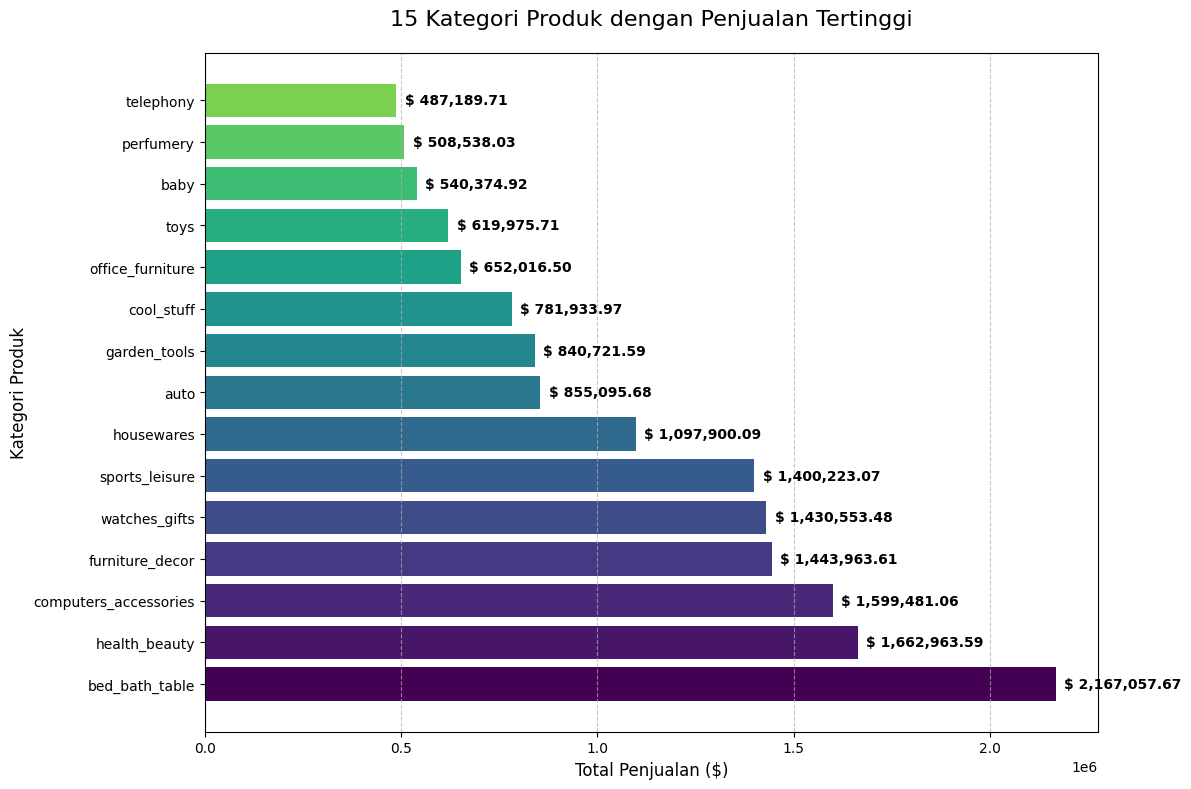

In [26]:
# Menghitung total penjualan per kategori
sales_by_category = final_df.groupby('product_category_name_english').agg({
    'payment_value': 'sum',
    'order_id': 'nunique'  # Menggunakan nunique untuk menghitung pesanan unik
}).reset_index()

# Mengurutkan berdasarkan total penjualan
sales_by_category = sales_by_category.sort_values('payment_value', ascending=False)

# Mengambil 15 kategori teratas untuk visualisasi
top_categories = sales_by_category.head(15)

# Membuat visualisasi
plt.figure(figsize=(12, 8))

# Membuat barplot horizontal dengan warna gradien
bars = plt.barh(top_categories['product_category_name_english'],
                top_categories['payment_value'],
                color=plt.cm.viridis(np.linspace(0, 0.8, len(top_categories))))

# Menambahkan anotasi nilai pada setiap bar
for i, bar in enumerate(bars):
    value = top_categories['payment_value'].iloc[i]
    plt.text(value + (sales_by_category['payment_value'].max() * 0.01),
              bar.get_y() + bar.get_height()/2,
              f'$ {value:,.2f}',
              va='center',
              fontweight='bold')

plt.title('15 Kategori Produk dengan Penjualan Tertinggi', fontsize=16, pad=20)
plt.xlabel('Total Penjualan ($)', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Insight:**
- Kategori bed_bath_table memimpin dengan penjualan tertinggi (2,16 juta), jauh di atas kategori lainnya
- Produk kebutuhan rumah tangga mendominasi penjualan teratas, dengan health_beauty (1,66 juta) dan computers_accessories (1,59 juta) melengkapi tiga besar.
- Terdapat kesenjangan besar antara kategori teratas dan terbawah, dengan telephony hanya mencapai sekitar 487 ribu.
- Konsumen lebih banyak membelanjakan uang untuk kebutuhan rumah tangga, kesehatan, dan teknologi dibanding kategori lainnya.

#### 2. Tren Penjualan Kategori Produk Unggulan Seiring Waktu

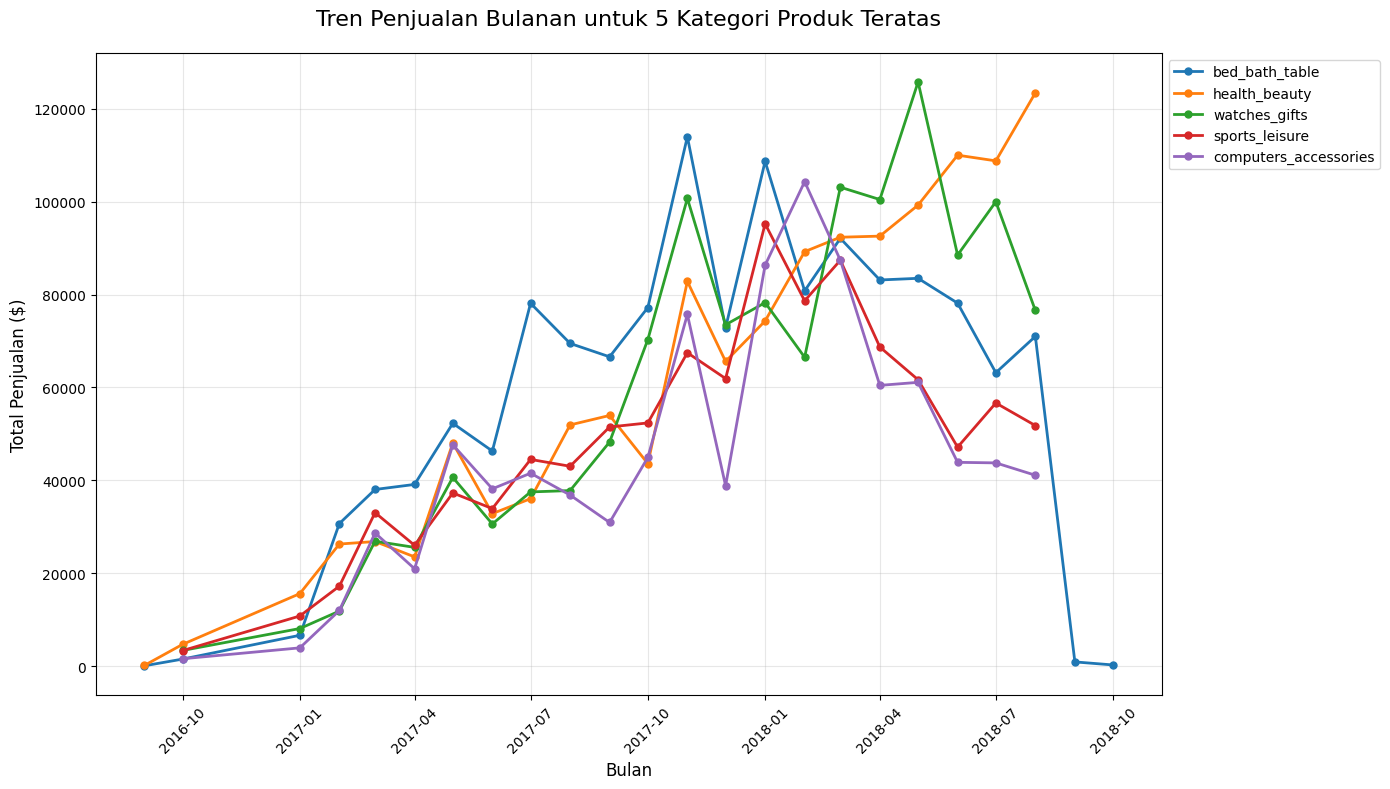

In [27]:
# Memastikan kolom tanggal dalam format datetime
if 'order_purchase_timestamp' not in final_df.columns or not pd.api.types.is_datetime64_any_dtype(final_df['order_purchase_timestamp']):
    final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])

# Menambahkan kolom bulan dan tahun untuk pengelompokan
final_df['year_month'] = final_df['order_purchase_timestamp'].dt.strftime('%Y-%m')

# Menghitung total penjualan per kategori
total_sales_by_category = final_df.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False)

# Mengambil 5 kategori teratas
top_5_categories = total_sales_by_category.head(5).index.tolist()

# Filter data untuk 5 kategori teratas
top_categories_data = final_df[final_df['product_category_name_english'].isin(top_5_categories)]

# Menghitung penjualan bulanan untuk 5 kategori teratas
monthly_sales = top_categories_data.groupby(['year_month', 'product_category_name_english'])['price'].sum().reset_index()

# Pivot data untuk plotting
pivot_data = monthly_sales.pivot(index='year_month', columns='product_category_name_english', values='price')

# Sortir index berdasarkan tanggal
pivot_data.index = pd.to_datetime(pivot_data.index, format='%Y-%m')
pivot_data = pivot_data.sort_index()

# Plotting
plt.figure(figsize=(14, 8))

# Membuat plot dengan warna berbeda untuk setiap kategori
for i, category in enumerate(top_5_categories):
    if category in pivot_data.columns:
        plt.plot(pivot_data.index, pivot_data[category],
                marker='o', markersize=5,
                linewidth=2,
                label=category)

plt.title('Tren Penjualan Bulanan untuk 5 Kategori Produk Teratas', fontsize=16, pad=20)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penjualan ($)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Insight:**
- Kategori health_beauty menunjukkan pertumbuhan paling konsisten, mencapai penjualan tertinggi sekitar 125.000 di akhir 2018.
- Watches_gifts menampilkan volatilitas tinggi dengan puncak sekitar 125.000 pada April 2018.
- Bed_bath_table awalnya memimpin dengan puncak 115.000 pada akhir 2017, namun mengalami penurunan drastis mendekati nol di Oktober 2018.
- Sports_leisure dan computers_accessories menunjukkan tren penurunan setelah mencapai puncak di awal 2018.
- Pola musiman terlihat jelas pada semua kategori, dengan lonjakan penjualan di periode-periode tertentu.

### Bagaimana faktor pengiriman dapat dioptimalkan untuk meningkatkan kepuasan pelanggan secara keseluruhan berdasarkan data yang tersedia?

#### 1. Pengaruh Karakteristik Produk terhadap Waktu Pengiriman

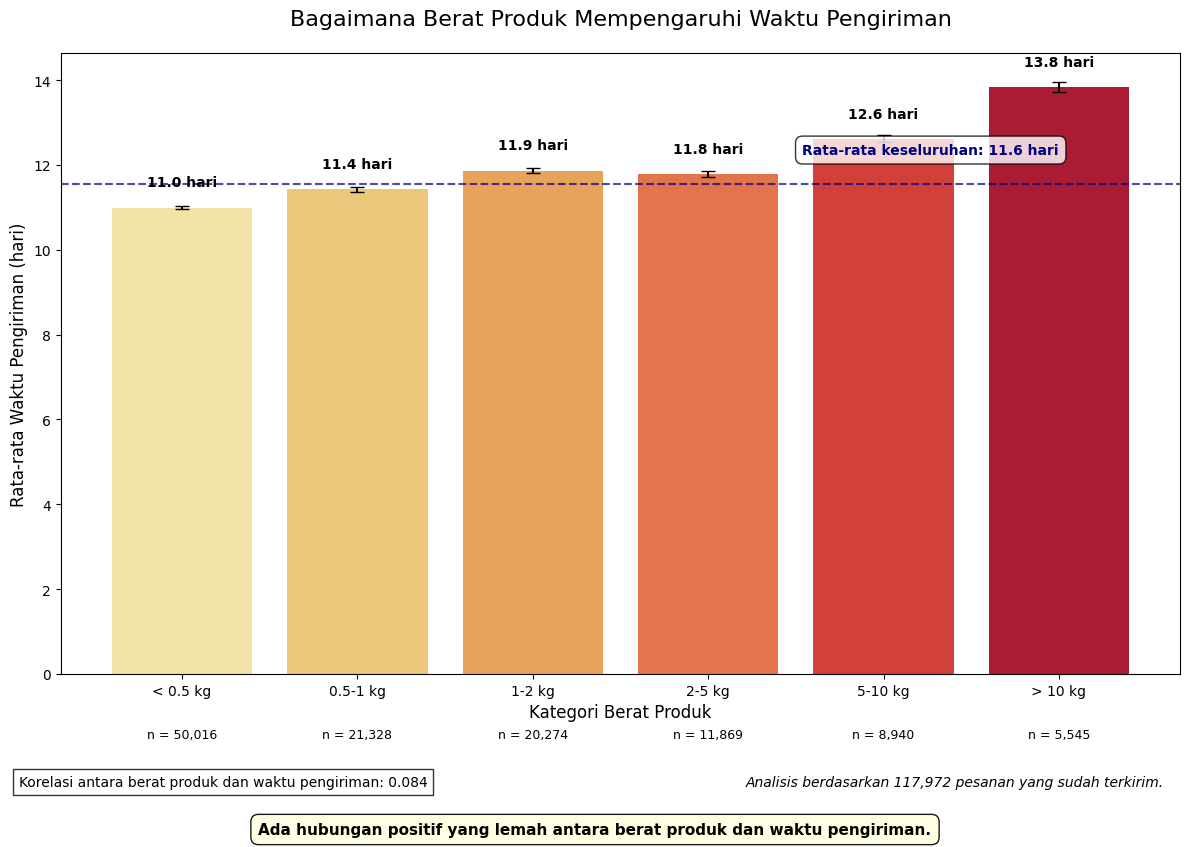

In [28]:
# Hitung waktu pengiriman dalam hari
final_df['delivery_time_days'] = (
    final_df['order_delivered_customer_date'] -
    final_df['order_purchase_timestamp']
).dt.days

# Filter data yang valid (waktu pengiriman masuk akal dan memiliki data berat produk)
valid_data = final_df[
    (final_df['delivery_time_days'] > 0) &
    (final_df['delivery_time_days'] <= final_df['delivery_time_days'].quantile(0.99)) &
    (final_df['product_weight_g'] > 0)
].copy()

# Buat kategori berat produk yang intuitif
valid_data['weight_category'] = pd.cut(
    valid_data['product_weight_g'],
    bins=[0, 500, 1000, 2000, 5000, 10000, float('inf')],
    labels=['< 0.5 kg', '0.5-1 kg', '1-2 kg', '2-5 kg', '5-10 kg', '> 10 kg']
)

# Buat figure dengan ukuran yang nyaman dilihat
plt.figure(figsize=(12, 8))

# Hitung statistik untuk setiap kategori berat
weight_stats = valid_data.groupby('weight_category', observed=True).agg({
    'delivery_time_days': ['mean', 'median', 'count', 'std']
})

# Rapikan nama kolom
weight_stats.columns = ['mean_days', 'median_days', 'count', 'std_days']
weight_stats = weight_stats.reset_index()

# Buat bar chart untuk rata-rata waktu pengiriman per kategori berat
bar_plot = sns.barplot(
    x='weight_category',
    y='mean_days',
    data=weight_stats,
    palette='YlOrRd'
)

# Tambahkan error bar untuk menunjukkan variabilitas
bar_plot.errorbar(
    x=weight_stats.index,
    y=weight_stats['mean_days'],
    yerr=weight_stats['std_days'] / np.sqrt(weight_stats['count']),  # Standard error
    fmt='none',
    color='black',
    capsize=5
)

# Tambahkan label nilai di atas bar
for i, row in enumerate(weight_stats.itertuples()):
    plt.text(
        i, row.mean_days + 0.5,
        f'{row.mean_days:.1f} hari',
        ha='center',
        fontweight='bold'
    )
    # Tambahkan jumlah produk di bawah label kategori
    plt.text(
        i, -1.5,
        f'n = {row.count:,}',
        ha='center',
        fontsize=9
    )

# Tambahkan referensi rata-rata keseluruhan
overall_mean = valid_data['delivery_time_days'].mean()
plt.axhline(y=overall_mean, color='navy', linestyle='--', alpha=0.7)
plt.text(
    len(weight_stats) - 1, overall_mean + 0.7,
    f'Rata-rata keseluruhan: {overall_mean:.1f} hari',
    ha='right',
    color='navy',
    fontweight='bold',
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5')
)

# Tambahkan judul dan label yang jelas
plt.title('Bagaimana Berat Produk Mempengaruhi Waktu Pengiriman', fontsize=16, pad=20)
plt.xlabel('Kategori Berat Produk', fontsize=12)
plt.ylabel('Rata-rata Waktu Pengiriman (hari)', fontsize=12)

# Tambahkan keterangan tentang sampel
plt.figtext(
    0.8, 0.01,
    f"Analisis berdasarkan {len(valid_data):,} pesanan yang sudah terkirim.",
    ha='center',
    fontsize=10,
    style='italic'
)

# Tambahkan keterangan tentang korelasi
correlation = valid_data[['product_weight_g', 'delivery_time_days']].corr().iloc[0, 1]
plt.figtext(
    0.02, 0.01,
    f"Korelasi antara berat produk dan waktu pengiriman: {correlation:.3f}",
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.8)
)

# Tambahkan catatan interpretasi
if correlation > 0.3:
    interpretation = "Ada hubungan positif yang kuat: produk lebih berat membutuhkan waktu pengiriman lebih lama."
elif correlation > 0.1:
    interpretation = "Ada hubungan positif yang moderat: produk lebih berat cenderung membutuhkan waktu pengiriman lebih lama."
elif correlation > 0:
    interpretation = "Ada hubungan positif yang lemah antara berat produk dan waktu pengiriman."
else:
    interpretation = "Tidak ada hubungan yang jelas antara berat produk dan waktu pengiriman."

plt.figtext(
    0.5, -0.05,
    interpretation,
    ha='center',
    fontsize=11,
    fontweight='bold',
    bbox=dict(facecolor='lightyellow', alpha=0.9, boxstyle='round,pad=0.5')
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

**Insight:**
- Terdapat tren peningkatan waktu pengiriman seiring bertambahnya berat produk, dengan produk terberat (>10 kg) membutuhkan waktu pengiriman terlama yaitu 13.8 hari.
- Produk ringan (0.5 kg) memiliki waktu pengiriman tercepat yaitu 11.0 hari, dengan selisih 2.8 hari dibandingkan produk terberat.
- Peningkatan waktu pengiriman paling signifikan terjadi pada kategori produk berat (5-10 kg dan >10 kg).
- Meskipun terdapat pola peningkatan, korelasi antara berat produk dan waktu pengiriman tergolong lemah (0.084), menunjukkan bahwa berat produk bukan satu-satunya faktor dominan yang mempengaruhi waktu pengiriman.
- Rata-rata keseluruhan waktu pengiriman adalah 11.6 hari berdasarkan analisis dari 117,972 pesanan yang telah terkirim.
- Terjadi anomali kecil pada kategori 2-5 kg (11.8 hari) yang sedikit lebih cepat dibanding kategori 1-2 kg (11.9 hari).

#### 2. Pengaruh Waktu Pengiriman terhadap Review Score

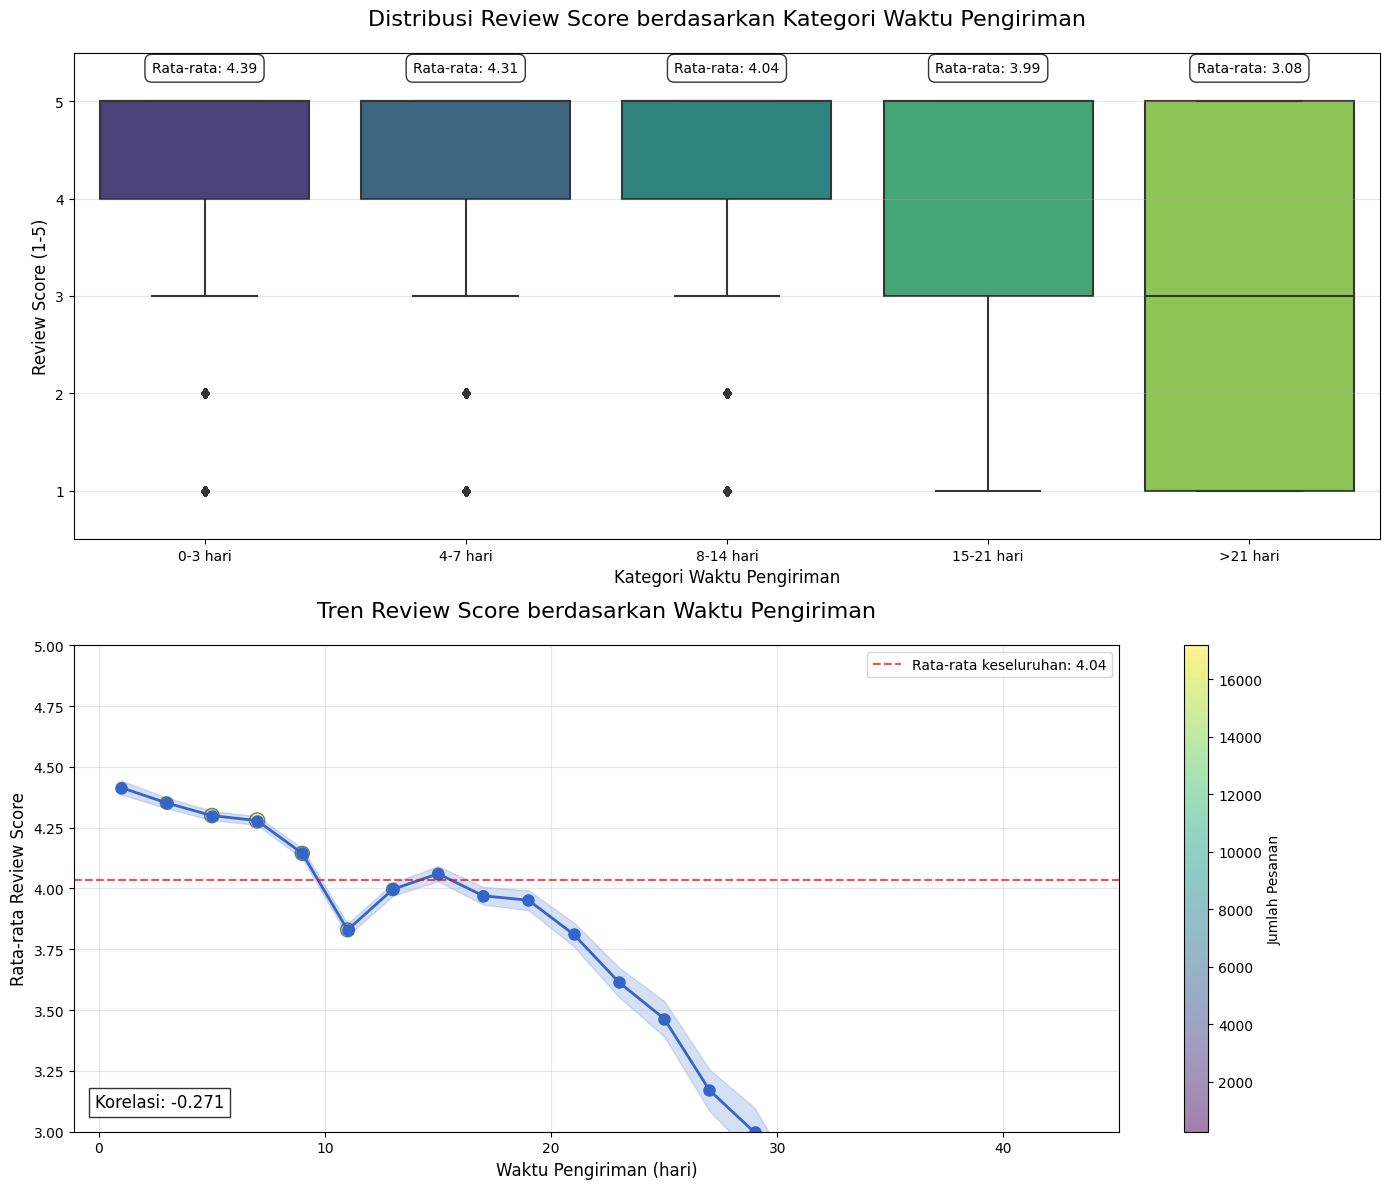

In [29]:
# Membuang data pesanan yang tidak memiliki tanggal pengiriman ke pelanggan atau skor review
delivered_orders = final_df.dropna(subset=['order_delivered_customer_date', 'review_score'])
delivery_review = delivered_orders.copy()

# Menghitung waktu pengiriman dalam satuan hari
# dengan mengurangi tanggal pembelian dari tanggal pengiriman ke pelanggan
delivery_review.loc[:, 'delivery_time'] = (
    delivery_review['order_delivered_customer_date'] -
    delivery_review['order_purchase_timestamp']
).dt.days

# Memfilter data untuk hanya mengambil waktu pengiriman yang positif
# (menghilangkan data aneh di mana tanggal pengiriman lebih awal dari pembelian)
mask = (delivery_review['delivery_time'] > 0)
valid_data = delivery_review[mask].copy()

# Mengatasi outlier dengan hanya mengambil data sampai persentil ke-99
# dari waktu pengiriman untuk menghindari distorsi karena nilai ekstrem
max_delivery_time = valid_data['delivery_time'].quantile(0.99)
valid_data = valid_data[valid_data['delivery_time'] <= max_delivery_time].copy()

# Membuat kategori waktu pengiriman untuk mempermudah analisis dan visualisasi
valid_data.loc[:, 'delivery_time_category'] = pd.cut(
    valid_data['delivery_time'],
    bins=[0, 3, 7, 14, 21, float('inf')],  # Menentukan batas interval kategori
    labels=['0-3 hari', '4-7 hari', '8-14 hari', '15-21 hari', '>21 hari']  # Label untuk setiap kategori
)

# Membuat subplots dengan dua grafik: boxplot di atas dan line plot di bawah
# dengan rasio tinggi 1:1
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 1]})

# Membuat boxplot untuk menunjukkan distribusi review score berdasarkan kategori waktu pengiriman
sns.boxplot(
    x='delivery_time_category',
    y='review_score',
    data=valid_data,
    palette='viridis',
    ax=ax1
)

# Menambahkan judul dan label pada boxplot
ax1.set_title('Distribusi Review Score berdasarkan Kategori Waktu Pengiriman', fontsize=16, pad=20)
ax1.set_xlabel('Kategori Waktu Pengiriman', fontsize=12)
ax1.set_ylabel('Review Score (1-5)', fontsize=12)
ax1.set_ylim(0.5, 5.5)  # Mengatur batas y-axis untuk kejelasan visual
ax1.grid(axis='y', alpha=0.3)  # Menambahkan grid samar pada sumbu y

# Menghitung rata-rata review score untuk setiap kategori waktu pengiriman
category_avg = valid_data.groupby('delivery_time_category', observed=True)['review_score'].mean()

# Menambahkan label rata-rata review score di atas setiap boxplot
for i, category in enumerate(category_avg.index):
    ax1.text(
        i,
        5.3,  # Posisi y untuk text (sedikit di atas boxplot)
        f'Rata-rata: {category_avg[category]:.2f}',  # Format nilai rata-rata dengan 2 desimal
        ha='center',  # Horizontal alignment: center
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5')  # Kotak putih semi-transparan
    )

# Membuat bins untuk waktu pengiriman dengan interval 2 hari
# untuk analisis tren yang lebih halus pada grafik kedua
delivery_bins = list(range(0, int(max_delivery_time) + 1, 2))

# Mengelompokkan data berdasarkan bin waktu pengiriman dan menghitung rata-rata dan jumlah
review_by_delivery = valid_data.groupby(
    pd.cut(valid_data['delivery_time'], bins=delivery_bins),
    observed=True
)['review_score'].agg(['mean', 'count']).reset_index()

# Mengambil nilai tengah dari setiap bin untuk digunakan sebagai nilai x dalam plot
review_by_delivery['delivery_time_mid'] = review_by_delivery['delivery_time'].apply(lambda x: x.mid)

# Memfilter hanya bin dengan minimal 10 data untuk hasil yang lebih reliabel
review_by_delivery = review_by_delivery[review_by_delivery['count'] >= 10]

# Membuat line plot untuk menunjukkan tren review score berdasarkan waktu pengiriman
ax2.plot(
    review_by_delivery['delivery_time_mid'],
    review_by_delivery['mean'],
    'o-',  # Gaya plot: garis dengan marker lingkaran
    color='#3366cc',
    linewidth=2,
    markersize=8
)

# Menghitung standard error untuk setiap bin untuk visualisasi interval kepercayaan
review_by_delivery['se'] = valid_data.groupby(
    pd.cut(valid_data['delivery_time'], bins=delivery_bins),
    observed=True
)['review_score'].agg(lambda x: x.std() / np.sqrt(len(x))).values

# Menambahkan interval kepercayaan 95% (±1.96 SE) sebagai area berbayang pada line plot
ax2.fill_between(
    review_by_delivery['delivery_time_mid'],
    review_by_delivery['mean'] - 1.96 * review_by_delivery['se'],
    review_by_delivery['mean'] + 1.96 * review_by_delivery['se'],
    color='#3366cc',
    alpha=0.2
)

# Menambahkan garis horizontal yang menunjukkan rata-rata keseluruhan review score
overall_mean = valid_data['review_score'].mean()
ax2.axhline(y=overall_mean, color='red', linestyle='--', alpha=0.7, label=f'Rata-rata keseluruhan: {overall_mean:.2f}')

# Menambahkan judul dan label pada line plot
ax2.set_title('Tren Review Score berdasarkan Waktu Pengiriman', fontsize=16, pad=20)
ax2.set_xlabel('Waktu Pengiriman (hari)', fontsize=12)
ax2.set_ylabel('Rata-rata Review Score', fontsize=12)
ax2.set_ylim(3.0, 5.0)  # Mengatur batas y-axis untuk fokus pada variasi yang relevan
ax2.grid(True, alpha=0.3)  # Menambahkan grid samar
ax2.legend()  # Menampilkan legenda

# Menghitung korelasi antara waktu pengiriman dan review score
correlation = valid_data[['delivery_time', 'review_score']].corr().iloc[0, 1]

# Menambahkan teks yang menunjukkan nilai korelasi di pojok kiri bawah grafik
ax2.text(
    0.02, 0.05,  # Posisi relatif (2% dari kiri, 5% dari bawah)
    f'Korelasi: {correlation:.3f}',
    transform=ax2.transAxes,  # Menggunakan koordinat relatif terhadap axes
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)  # Kotak putih semi-transparan
)

# Menambahkan scatter plot di atas line plot dengan ukuran titik sesuai jumlah pesanan
# Ini membantu memvisualisasikan bobot statistik dari setiap titik data
sizes = review_by_delivery['count'] / review_by_delivery['count'].max() * 100 + 20
scatter = ax2.scatter(
    review_by_delivery['delivery_time_mid'],
    review_by_delivery['mean'],
    s=sizes,  # Ukuran marker sesuai dengan jumlah pesanan
    alpha=0.5,  # Semi-transparan
    c=review_by_delivery['count'],  # Warna marker sesuai dengan jumlah pesanan
    cmap='viridis',  # Skema warna
    edgecolor='black'  # Garis tepi hitam untuk kejelasan
)

# Menambahkan color bar untuk menunjukkan hubungan warna dengan jumlah pesanan
cbar = fig.colorbar(scatter, ax=ax2)
cbar.set_label('Jumlah Pesanan', fontsize=10)

# Mengatur layout untuk menghindari tumpang tindih elemen
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

**Insight:**
- Terdapat hubungan negatif yang jelas antara waktu pengiriman dan kepuasan pelanggan. Semakin lama waktu pengiriman, semakin rendah rating review yang diberikan.
- Pengiriman cepat (0-3 hari) mendapatkan rating tertinggi dengan rata-rata 4.39, sementara pengiriman sangat lambat (>21 hari) mendapatkan rating terendah dengan rata-rata hanya 3.08.
Variabilitas review meningkat signifikan pada kategori pengiriman yang lebih lama. Untuk pengiriman 0-14 hari, sebagian besar review terkonsentrasi antara 4-5 bintang. Namun untuk pengiriman >21 hari, distribusi melebar hingga ke rating 1 bintang.
- Dari grafik trend di bawahnya, terlihat penurunan rating yang stabil seiring bertambahnya waktu pengiriman, dengan penurunan paling tajam terjadi setelah 15-20 hari.
- Korelasi negatif sebesar -0.271 mengkonfirmasi adanya hubungan yang cukup kuat antara keterlambatan pengiriman dan penurunan kepuasan pelanggan.
- Rata-rata keseluruhan review adalah 4.04, yang menunjukkan bahwa mayoritas pelanggan masih memberikan rating positif selama pengiriman tidak melebihi 14 hari.

#### 3. Pengaruh Tarif Pengiriman terhadap Review Score

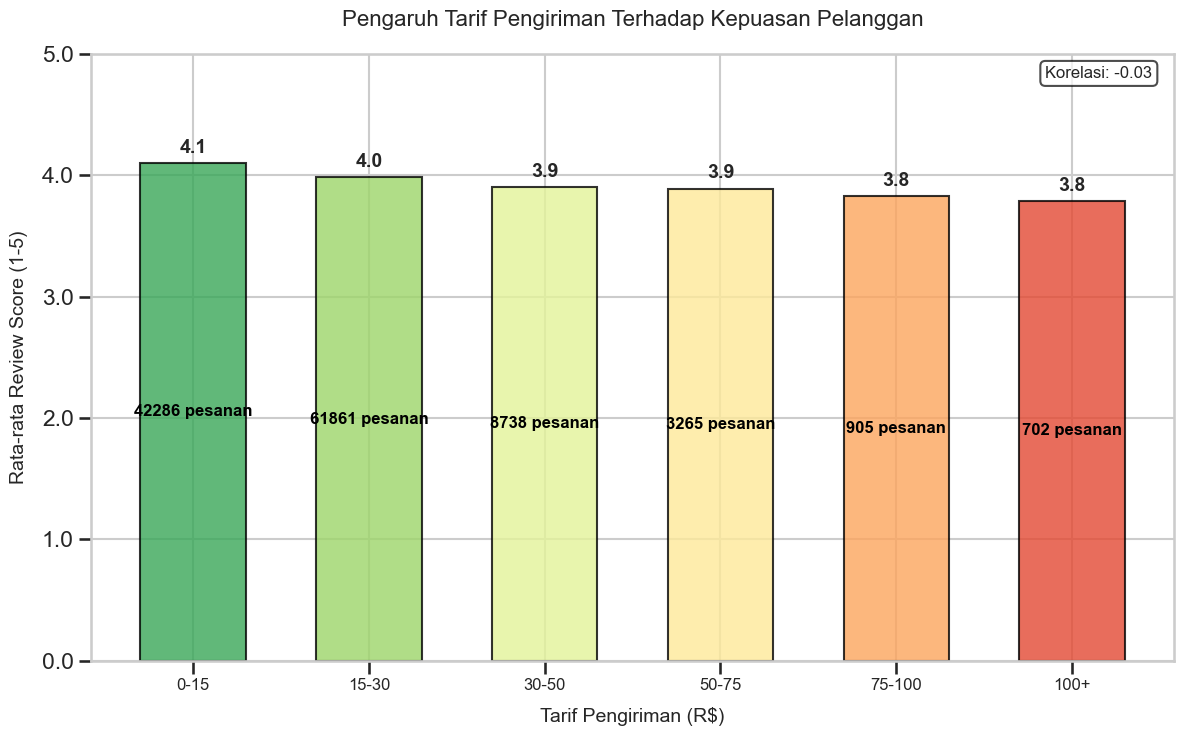

In [30]:
# Mengatur gaya visualisasi menggunakan Seaborn
plt.style.use('seaborn-v0_8-whitegrid')  # Menggunakan style whitegrid dari Seaborn untuk latar belakang
sns.set_context("talk")  # Mengatur konteks visualisasi ke 'talk' yang lebih sesuai untuk presentasi

# Konfigurasi parameter tampilan grafik
plt.rcParams['figure.figsize'] = (12, 10)  # Mengatur ukuran default figure menjadi 12x10 inci
plt.rcParams['font.size'] = 12  # Mengatur ukuran font default menjadi 12
plt.rcParams['font.family'] = 'sans-serif'  # Menggunakan font sans-serif untuk keterbacaan yang lebih baik

# Membersihkan data dengan menghapus baris yang memiliki nilai kosong pada kolom freight_value dan review_score
clean_df = final_df.dropna(subset=['freight_value', 'review_score']).copy()

# Mendefinisikan rentang nilai untuk kategorisasi tarif pengiriman
bins = [0, 15, 30, 50, 75, 100, float('inf')]  # Batas-batas kategori
labels = ["0-15", "15-30", "30-50", "50-75", "75-100", "100+"]  # Label untuk setiap kategori

# Membuat kategori tarif pengiriman berdasarkan bins dan labels yang telah didefinisikan
clean_df['freight_category'] = pd.cut(clean_df['freight_value'], bins=bins, labels=labels)

# Menghitung rata-rata review score untuk setiap kategori tarif pengiriman
avg_ratings = clean_df.groupby('freight_category')['review_score'].mean()

# Menghitung jumlah pesanan untuk setiap kategori tarif pengiriman
order_counts = clean_df.groupby('freight_category').size()

# Menghitung korelasi Pearson antara nilai tarif pengiriman dan review score
# Mengambil hanya nilai korelasi (indeks 0) dari fungsi pearsonr yang mengembalikan korelasi dan p-value
correlation = stats.pearsonr(clean_df['freight_value'], clean_df['review_score'])[0]

# Membuat figure dan axis untuk visualisasi
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Menyiapkan data untuk visualisasi bar chart
categories = labels  # Menggunakan label kategori yang telah didefinisikan
bar_positions = np.arange(len(categories))  # Menentukan posisi untuk setiap bar
bar_width = 0.6  # Mengatur lebar bar

# Membuat gradasi warna dari merah ke hijau terbalik (nilai tinggi = merah, nilai rendah = hijau)
colors = sns.color_palette("RdYlGn_r", len(categories))

# Membuat bar chart
bars = ax.bar(
    bar_positions,  # Posisi bar pada sumbu x
    avg_ratings,    # Tinggi bar (rata-rata review score)
    bar_width,      # Lebar bar
    color=colors,   # Warna bar sesuai palette
    edgecolor='black',  # Garis tepi hitam untuk memperjelas batas bar
    linewidth=1.5,      # Ketebalan garis tepi
    alpha=0.8           # Tingkat transparansi untuk estetika visual
)

# Menambahkan label nilai rata-rata review score di atas setiap bar
for i, bar in enumerate(bars):
    height = bar.get_height()  # Mendapatkan tinggi bar (rata-rata review score)
    ax.text(
        bar.get_x() + bar.get_width()/2.,  # Posisi x (tengah bar)
        height + 0.05,                      # Posisi y (sedikit di atas bar)
        f'{avg_ratings[i]:.1f}',            # Nilai rata-rata dengan 1 desimal
        ha='center',                        # Horizontal alignment: center
        va='bottom',                        # Vertical alignment: bottom
        fontsize=14,                        # Ukuran font
        fontweight='bold'                   # Ketebalan font
    )

    # Menambahkan label jumlah pesanan di tengah setiap bar
    ax.text(
        bar.get_x() + bar.get_width()/2.,  # Posisi x (tengah bar)
        height/2,                          # Posisi y (tengah bar)
        f'{order_counts[i]} pesanan',      # Teks jumlah pesanan
        ha='center',                       # Horizontal alignment: center
        va='center',                       # Vertical alignment: center
        fontsize=12,                       # Ukuran font
        fontweight='bold',                 # Ketebalan font
        color='black'                      # Warna teks
    )

# Menambahkan judul dan label sumbu
ax.set_title('Pengaruh Tarif Pengiriman Terhadap Kepuasan Pelanggan', fontsize=16, pad=20)
ax.set_xlabel('Tarif Pengiriman (R$)', fontsize=14, labelpad=10)
ax.set_ylabel('Rata-rata Review Score (1-5)', fontsize=14, labelpad=10)

# Mengatur ticks pada sumbu x dengan posisi dan label yang sesuai
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories, fontsize=12)

# Mengatur batas sumbu y dari 0 hingga 5 (rentang review score)
ax.set_ylim(0, 5)
# Mengatur format nilai pada sumbu y dengan 1 desimal
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Menambahkan teks yang menampilkan nilai korelasi di pojok kanan atas
ax.text(
    0.98, 0.98,                           # Posisi relatif (98% dari kiri, 98% dari bawah)
    f'Korelasi: {correlation:.2f}',       # Teks nilai korelasi dengan 2 desimal
    transform=ax.transAxes,               # Menggunakan koordinat relatif terhadap axes
    fontsize=12,                          # Ukuran font
    ha='right',                           # Horizontal alignment: right
    va='top',                             # Vertical alignment: top
    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')  # Kotak putih semi-transparan
)

# Mengatur layout untuk menghindari tumpang tindih elemen
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Menampilkan visualisasi
plt.show()

**Insight:**
- Semakin tinggi tarif pengiriman, semakin rendah tingkat kepuasan pelanggan.
- Pesanan dengan tarif di bawah 30 memiliki rating rata-rata di atas 4.
- Tarif lebih dari 75 menyebabkan penurunan signifikan pada kepuasan
- Mayoritas pesanan (78%) menggunakan tarif pengiriman di bawah 50

## 6 Analisis Lanjutan (Opsional)

#### 1. RFM Analysis

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,163
2,0000f46a3911fa3c0805444483337064,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337


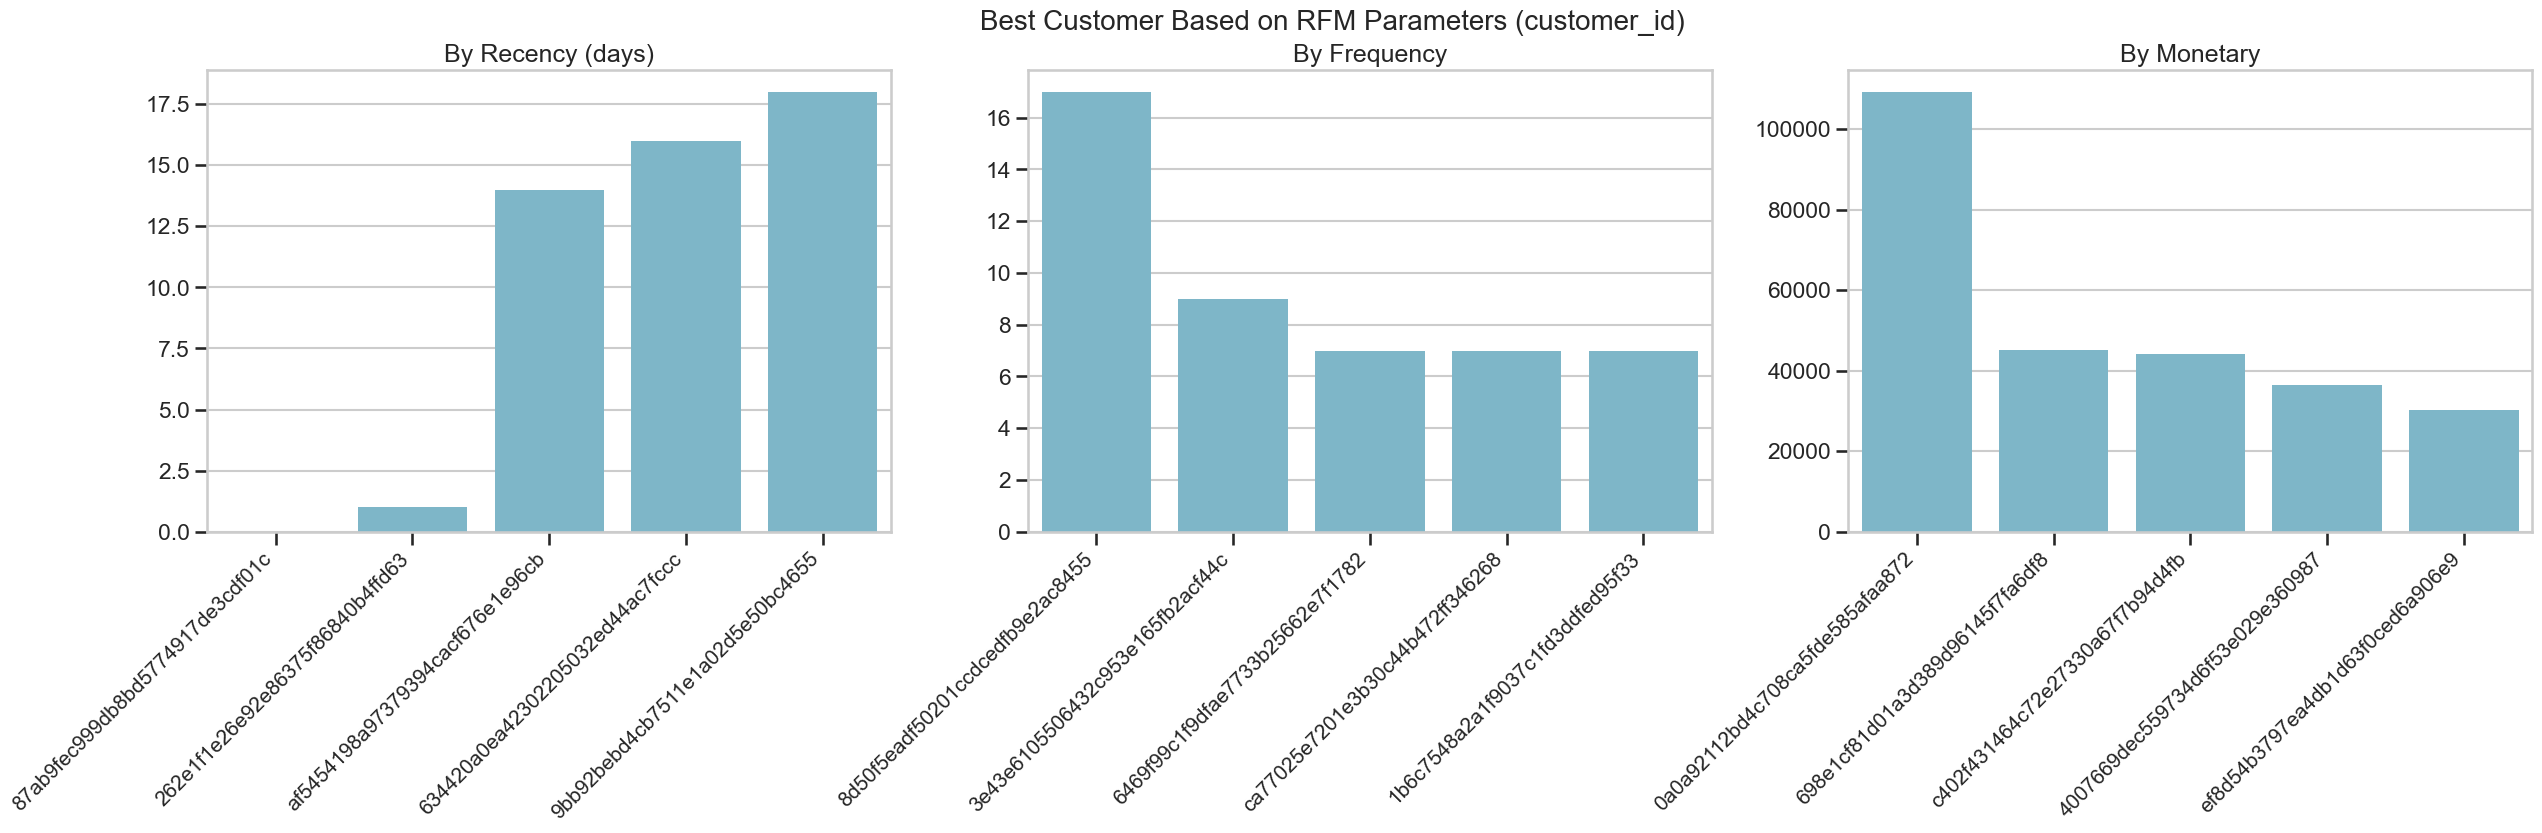

In [31]:
# Membuat dataframe RFM dengan mengelompokkan data berdasarkan ID pelanggan unik
rfm_df = final_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",      # Tanggal pembelian terakhir (untuk Recency)
    "order_id": "nunique",                 # Jumlah pesanan unik (untuk Frequency)
    "payment_value": "sum"                  # Total nilai pembelian (untuk Monetary)
})

# Mengubah nama kolom agar lebih deskriptif
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Mengubah format timestamp menjadi tanggal saja (tanpa waktu)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date

# Mengambil tanggal terbaru dalam dataset sebagai titik referensi
recent_date = final_df["order_purchase_timestamp"].dt.date.max()

# Menghitung Recency: jumlah hari sejak pembelian terakhir hingga tanggal terbaru
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom max_order_timestamp yang sudah tidak diperlukan
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Menampilkan 5 baris pertama dari dataframe RFM untuk pemeriksaan
display(rfm_df.head())
print("\n\n")

# Membuat subplots dengan 3 kolom untuk visualisasi ketiga parameter RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Mendefinisikan skema warna yang konsisten untuk semua visualisasi
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Plot 1: Visualisasi 5 pelanggan dengan Recency terendah (pembelian paling baru)
# FIXED: Removed redundant hue parameter and legend=False
sns.barplot(y="recency", x="customer_id",
            data=rfm_df.sort_values(by="recency", ascending=True).head(5),
            palette=colors, ax=ax[0])

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ticks = ax[0].get_xticks()
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Plot 2: Visualisasi 5 pelanggan dengan Frequency tertinggi (jumlah pesanan terbanyak)
# FIXED: Removed redundant hue parameter and legend=False
sns.barplot(y="frequency", x="customer_id",
            data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
            palette=colors, ax=ax[1])

ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ticks = ax[1].get_xticks()
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

# Plot 3: Visualisasi 5 pelanggan dengan Monetary tertinggi (nilai pembelian terbesar)
# FIXED: Removed redundant hue parameter and legend=False
sns.barplot(y="monetary", x="customer_id",
            data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
            palette=colors, ax=ax[2])

ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ticks = ax[2].get_xticks()
ax[2].set_xticks(ticks)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')

# Menambahkan judul utama untuk keseluruhan visualisasi
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)

# Menampilkan visualisasi
plt.show()

**Insight:**
- Recency : Pelanggan teratas baru saja berbelanja (0 hari) dan Terdapat perbedaan besar antara 2 pelanggan teratas dengan 3 pelanggan lainnya (sekitar 13-18 hari)
- Frequency : Pelanggan teratas melakukan sekitar 17 pembelian dan Pelanggan lainnya memiliki frekuensi yang jauh lebih rendah (7-9 pembelian)
- Monetary : Pelanggan teratas menghabiskan sekitar 100.000+ (2x lipat dari pelanggan berikutnya) dan Terjadi penurunan bertahap pada nilai belanja pelanggan lainnya
- Tidak ada pelanggan yang unggul di semua dimensi, menunjukkan segmentasi pelanggan yang berbeda berdasarkan perilaku pembelian mereka.

#### 2. Manual Grouping - Analisa Kategori Berdasarkan jumlah transaksi, harga, review dan total revenue

In [32]:
category_analysis = final_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "product_id": "nunique",
    "price": "mean",
    "review_score": "mean",
    "payment_value": "sum"
})

print("1. [Kategori Dengan Produk Paling Banyak]")
display(category_analysis.sort_values(by="product_id", ascending=False).head(3))

print("\n\n2. [Kategori Dengan Produk Paling Sedikit]")
display(category_analysis.sort_values(by="product_id", ascending=True).head(3))

print("\n\n3. [Kategori Dengan Transaksi Paling Banyak]")
display(category_analysis.sort_values(by="order_id", ascending=False).head(3))

print("\n\n4. [Kategori Dengan Transaksi Paling Sedikit]")
display(category_analysis.sort_values(by="order_id", ascending=True).head(3))

print("\n\n5. [Kategori Dengan Rata-rata harga tertinggi]")
display(category_analysis.sort_values(by="price", ascending=False).head(3))

print("\n\n6. [Kategori Dengan Rata-rata harga terendah]")
display(category_analysis.sort_values(by="price", ascending=True).head(3))

print("\n\n7. [Kategori Dengan Rata-rata review tertinggi]")
display(category_analysis.sort_values(by="review_score", ascending=False).head(3))

print("\n\n8. [Kategori Dengan Rata-rata review terendah]")
display(category_analysis.sort_values(by="review_score", ascending=True).head(3))

print("\n\n9. [Kategori Dengan Rata-rata revenue tertinggi]")
display(category_analysis.sort_values(by="payment_value", ascending=False).head(3))

print("\n\n10. [Kategori Dengan Rata-rata revenue terendah]")
display(category_analysis.sort_values(by="payment_value", ascending=True).head(3))

1. [Kategori Dengan Produk Paling Banyak]


,order_id,product_id,price,review_score,payment_value
product_category_name_english,,,,,
bed_bath_table,11657,3652,93.071569,3.761908,2167057.67
sports_leisure,7720,2867,114.349609,4.107470,1400223.07
furniture_decor,6449,2657,87.420309,3.912158,1443963.61




2. [Kategori Dengan Produk Paling Sedikit]


,order_id,product_id,price,review_score,payment_value
product_category_name_english,,,,,
cds_dvds_musicals,12,1,52.142857,4.642857,1199.43
security_and_services,2,2,141.645000,2.500000,324.51
home_comfort_2,24,5,24.940968,3.642857,1710.54




3. [Kategori Dengan Transaksi Paling Banyak]


,order_id,product_id,price,review_score,payment_value
product_category_name_english,,,,,
bed_bath_table,11657,3652,93.071569,3.761908,2167057.67
health_beauty,8836,2444,129.779503,4.137026,1662963.59
sports_leisure,7720,2867,114.349609,4.107470,1400223.07




4. [Kategori Dengan Transaksi Paling Sedikit]


,order_id,product_id,price,review_score,payment_value
product_category_name_english,,,,,
security_and_services,2,2,141.645000,2.500000,324.51
fashion_childrens_clothes,8,5,71.231250,4.500000,785.67
cds_dvds_musicals,12,1,52.142857,4.642857,1199.43




5. [Kategori Dengan Rata-rata harga tertinggi]


,order_id,product_id,price,review_score,payment_value
product_category_name_english,,,,,
computers,181,30,1103.689136,4.184332,279121.55
small_appliances_home_oven_and_coffee,75,31,627.509103,4.320513,51229.32
home_appliances_2,234,90,457.529481,4.212687,124865.92




6. [Kategori Dengan Rata-rata harga terendah]


,order_id,product_id,price,review_score,payment_value
product_category_name_english,,,,,
home_comfort_2,24,5,24.940968,3.642857,1710.54
flowers,29,14,33.637576,4.419355,2213.01
diapers_and_hygiene,27,12,40.194615,3.256410,4221.25




7. [Kategori Dengan Rata-rata review tertinggi]


,order_id,product_id,price,review_score,payment_value
product_category_name_english,,,,,
cds_dvds_musicals,12,1,52.142857,4.642857,1199.43
fashion_childrens_clothes,8,5,71.231250,4.500000,785.67
books_general_interest,512,216,85.305221,4.438503,64694.76




8. [Kategori Dengan Rata-rata review terendah]


,order_id,product_id,price,review_score,payment_value
product_category_name_english,,,,,
security_and_services,2,2,141.645000,2.500000,324.51
diapers_and_hygiene,27,12,40.194615,3.256410,4221.25
office_furniture,1273,309,160.750979,3.526791,652016.50




9. [Kategori Dengan Rata-rata revenue tertinggi]


,order_id,product_id,price,review_score,payment_value
product_category_name_english,,,,,
bed_bath_table,11657,3652,93.071569,3.761908,2167057.67
health_beauty,8836,2444,129.779503,4.137026,1662963.59
computers_accessories,6689,1639,116.571005,3.936089,1599481.06




10. [Kategori Dengan Rata-rata revenue terendah]


,order_id,product_id,price,review_score,payment_value
product_category_name_english,,,,,
security_and_services,2,2,141.645000,2.500000,324.51
fashion_childrens_clothes,8,5,71.231250,4.500000,785.67
cds_dvds_musicals,12,1,52.142857,4.642857,1199.43


**Insight:**
- Kategori paling banyak dijual adalah bed_bath_table dengan produk sebanyak 3652. Sedangkan kategori paling sedikit produk yang dijual adalah cds_dvds_musical yang hanya sebanyak 1 produk.
- Transaksi paling banyak didominasi oleh kategori bed_bath_table dengan transaksi sebanyak 11.657. Sedangkan kategori security_and_services memiliki transaksi paling sedikit yaitu 2.
- Kategori yang memiliki harga rata-rata tertinggi adalah kategori computers dengan rata-rata harga yaitu 1103,68. Sedangkan kategori dengan harga rata-rata terendah yaitu pada home_comfort_2 dengan rata-rata 24,94.
- Kategori yang mendapatkan rata-rata review terbagus adalah cds_dvds_musical dengan rata-rata score yaitu 4.64. Sedangkan kategori dengan rata-rata terendah yaitu pada security_and_services sebesar 2,5.
- Kategori yang memiliki revenue tertinggi yaitu pada bed_bath_table sebanyak 2167057,673. Sedangkan kategori yang memiliki revenue terendah yaitu security_and_services dengan nilai 324,51.

## 7. Conclusion

#### 1. Bagaimana performa penjualan berdasarkan kategori produk dan bagaimana hal ini berubah seiring waktu:

Berdasarkan pola penjualan yang ditampilkan dalam visualisasi, beberapa faktor utama kemungkinan mempengaruhi performa kategori produk dari waktu ke waktu:
- Pertama, musiman dan perilaku konsumen terlihat jelas memengaruhi penjualan. Lonjakan penjualan di sekitar November-Desember 2017 untuk hampir semua kategori produk teratas menunjukkan pengaruh musim liburan akhir tahun. Demikian pula, puncak penjualan di bulan April 2018 untuk kategori watches_gifts kemungkinan terkait dengan momen pemberian hadiah musiman.
- Kedua, pergeseran preferensi konsumen terlihat dari tren yang berkembang. Kategori health_beauty menunjukkan pertumbuhan yang konsisten dan bahkan melampaui bed_bath_table pada akhir periode, mencerminkan meningkatnya perhatian konsumen terhadap kesehatan dan perawatan diri. Ini mungkin dipengaruhi oleh tren gaya hidup yang lebih luas atau perubahan demografis pembeli.
- Ketiga, faktor rantai pasokan atau perubahan internal perusahaan kemungkinan memengaruhi penurunan dramatis pada kategori bed_bath_table di akhir 2018. Pola penurunan yang sangat drastis dan tiba-tiba seperti ini jarang disebabkan semata-mata oleh perubahan preferensi konsumen.

#### 2. Bagaimana faktor pengiriman dapat dioptimalkan untuk meningkatkan kepuasan pelanggan secara keseluruhan berdasarkan data yang tersedia?

Berdasarkan analisis ketiga visualisasi, strategi pengiriman dapat dioptimalkan melalui beberapa pendekatan:
- Pertama, perusahaan sebaiknya memprioritaskan kecepatan pengiriman, karena data menunjukkan korelasi negatif yang cukup signifikan (-0.271) antara waktu pengiriman dan kepuasan pelanggan. Pengiriman yang diselesaikan dalam 7 hari atau kurang mendapatkan review score tertinggi (rata-rata 4.31-4.39).
- Kedua, perusahaan bisa mempertimbangkan untuk memberikan estimasi waktu pengiriman yang lebih akurat berdasarkan berat produk. Data menunjukkan bahwa produk dengan berat di atas 5 kg membutuhkan waktu pengiriman yang lebih lama (12.6-13.8 hari), sehingga perusahaan dapat mengomunikasikan hal ini kepada pelanggan untuk mengelola ekspektasi.
- Ketiga, perusahaan dapat mempertimbangkan untuk mensubsidi sebagian biaya pengiriman untuk mempertahankan tarif yang lebih rendah, karena data menunjukkan bahwa tarif pengiriman yang lebih rendah (0-15 R$) berkorelasi dengan kepuasan pelanggan yang lebih tinggi (4.1).
- Keempat, untuk produk berat (>10 kg) yang memiliki waktu pengiriman paling lama, perusahaan dapat mengembangkan layanan khusus atau kemitraan logistik untuk mempercepat pengiriman, sehingga dapat meningkatkan kepuasan pelanggan untuk segmen ini.
Dengan mengimplementasikan strategi-strategi tersebut, perusahaan dapat mencapai peningkatan signifikan dalam kepuasan pelanggan secara keseluruhan.